## 導関数の差分近似

連続な関数 $f(x)$ の導関数$\frac{df(x)}{dx}$ を求めたい．
$f(x)$を離散化した関数 $f_i = f(x_i)$ から，$x = x_i$ における導関数 $f^\prime = \left.\frac{df}{dx}\right|_{x = x_i}$を近似的に求めよう．

In [1]:
# 数値計算と可視化のライブラリ読み込み
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Taylor展開の復習

無限回微分可能で連続な関数$f(x)$について，基準となる $x_0$ から少し離れた $x_0+\Delta x$における値$f(x_0 + \Delta x)$は，$x = x_0$ における $f(x)$に関する情報から以下のように求めることができる．

$$
f(x_0+\Delta x) = f(x_0)+\sum_{n = 1}^{\infty} \frac{1}{n!}\frac{{\rm d} f(x_0)}{{\rm d} x} \Delta x
$$

$$
=f(x_0)
\!+\!\frac{{\rm d} f(x_0)}{{\rm d} x} \Delta x
\!+\!\frac{1}{2}\frac{{\rm d}^2 f(x_0)}{{\rm d} x^2} \Delta x^2
\!+\!\frac{1}{6}\frac{{\rm d}^3 f(x_0)}{{\rm d} x^3} \Delta x^3
\!+\!{\cal O}(\Delta x^4)
$$

以下の実例で実感してみよう．

In [2]:
# sin(0.1)を求めよ．
# sin(0) = 0, cos(0) = 1
dx = 0.1
f = 0 + 1 * dx + 1/2 * 0 * dx**2 + 1/6 * (-1) * dx**3 + 1/24 * 0 * dx**4

print('sin(0.1) is approximately equal to', f)
print('sin(0.1) =', np.sin(0.1))

sin(0.1) is approximately equal to 0.09983333333333334
sin(0.1) = 0.09983341664682815


In [3]:
# exp(-0.1)を求めよ．
# exp(0) = 1
# d/dx (exp(x)) = exp(x)
dx = -0.1
f = 1

print('exp(-0.1) is approximately equal to', f)
print('exp(-0.1) =', np.exp(-0.1))

exp(-0.1) is approximately equal to 1
exp(-0.1) = 0.9048374180359595


### 導関数の差分近似

$x_i = x_0+i*\Delta x$ として， $f_i = f(x_i)$ を定める．
$f^\prime_i = \left.\frac{df}{dx}\right|_{x = x_i}$ を $f_{i-1}$, $f_i$, $f_{i+1}$ を使って近似的に求めるには？

前進差分：
$$
f^\prime_i = \left.\frac{df}{dx}\right|_{x = x_i} \simeq \frac{f_{i+1}-f_i}{\Delta x}
$$

後退差分：
$$
f^\prime_i = \left.\frac{df}{dx}\right|_{x = x_i} \simeq \frac{f_i-f_{i-1}}{\Delta x}
$$

中心差分：
$$
f^\prime_i = \left.\frac{df}{dx}\right|_{x = x_i} \simeq \frac{f_{i+1}-f_{i-1}}{2 \Delta x}
$$

In [1]:
# xとf(x)をつくる

nGrid = 12 # グリッド数
x = np.linspace(0, 2*np.pi, num=nGrid)
dx = x[1] - x[0]
f = np.sin(x)
plt.plot(x, f, 'o-')

NameError: name 'np' is not defined

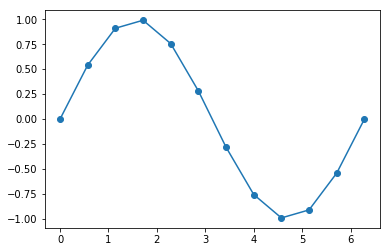

In [5]:
# df/dxを作る

f_prime = np.zeros(x.shape)
for i_ in range(len(f_prime)-1):
    f_prime[i_] = f[i_]
plt.plot(x, f_prime, 'o-')

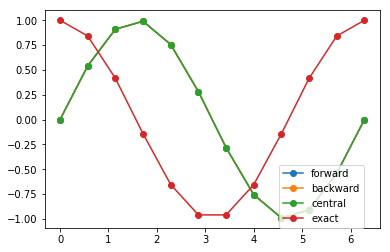

In [6]:
# df/dxを作る（前進・後退・中心）

f_prime_forward = np.zeros(x.shape)
f_prime_backward = np.zeros(x.shape)
f_prime_central = np.zeros(x.shape)

for i_ in range(len(f_prime)-1):
    f_prime_forward[i_] = f[i_]

for i_ in range(1, len(f_prime)):
    f_prime_backward[i_] = f[i_]

for i_ in range(1, len(f_prime)-1):
    f_prime_central[i_] = f[i_]

plt.plot(x, f_prime_forward, 'o-', label='forward')
plt.plot(x, f_prime_backward, 'o-', label='backward')
plt.plot(x, f_prime_central, 'o-', label='central')
plt.plot(x, np.cos(x), 'o-', label='exact')
plt.legend(loc=[0.7, 0.0])